## Importando bibliotecas

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import glob

## Criando e testando uma função que recebe como entrada um array de anos e um de meses e retorna um array de anos decimais.

In [9]:
dadosx = np.loadtxt ("dados/0.80S-49.02W-TAVG-Trend.txt", comments="%")
ano = dadosx[:,0]
mes = dadosx [:,1]

def ano_decimal(anos, meses):
    #Definindo tipo das variáveis
    assert type(anos) == np.ndarray, "tipo = array"
    assert type(meses) == np.ndarray, "tipo = array"
    #Definindo o que a funcão irá retornar
    return ((meses - 1)/10 + anos)

In [10]:
# Teste com dados do tipo correto
ano_decimal (ano, mes)

array([ 1845. ,  1845.1,  1845.2, ...,  2013.6,  2013.7,  2013.8])

In [11]:
# Teste com dados do tipo incorreto
ano_decimal (1845, 9)

AssertionError: tipo = array

## Criando e testando uma função que recebe como entrada uma matriz (array 2d) de dados de temperaturas e retorna os anos decimais, a anomalia anual, anomalia de 10 anos e sua respectiva incerteza.

In [12]:
def definindo_dados(dadosx):
    assert type(dadosx) == np.ndarray , "tipo = array"
    # Definindo ao que as variáveis correspondem
    anos = dadosx[:, 0]
    meses = dadosx[:, 1]
    ano_decimalx  = (meses - 1)/12 + anos
    anom_1anox = dados[:, 4]
    anom_10anosx = dados [:,8]
    inc_10anosx = dados [:, 9]
    inc_95posx = (anom_10anosx + inc_10anosx)
    inc_95negx = (anom_10anosx - inc_10anosx)
    # Definindo o que a funcão irá retornar
    return (ano_decimalx, anom_1anox, anom_10anosx, inc_95posx, inc_95negx)

# Obs.: usamos o sufixo "x" para não confundir as variáveis da funcão com as variáveis que serão criadas

In [13]:
# Teste com dados do tipo correto
definindo_dados (dadosx)

NameError: name 'dados' is not defined

In [14]:
# Teste com dados do tipo incorreto
definindo_dados(145)

AssertionError: tipo = array

## Usando as funções criadas acima para repetir a tarefa da prática Python 2.

In [16]:
# Usando a biblioteca glob para criar uma lista com todos os arquivos .txt dentro da pasta dados
arquivos = glob.glob("dados/*.txt")
print (arquivos)

['dados\\0.80S-49.02W-TAVG-Trend.txt', 'dados\\10.45S-48.27W-TAVG-Trend.txt', 'dados\\13.66S-38.81W-TAVG-Trend.txt', 'dados\\15.27S-47.50W-TAVG-Trend.txt', 'dados\\2.41S-60.27W-TAVG-Trend.txt', 'dados\\20.09S-44.36W-TAVG-Trend.txt', 'dados\\20.09S-54.60W-TAVG-Trend.txt', 'dados\\23.31S-42.82W-TAVG-Trend.txt', 'dados\\23.31S-46.31W-TAVG-Trend.txt', 'dados\\24.92S-49.66W-TAVG-Trend.txt', 'dados\\29.74S-51.69W-TAVG-Trend.txt', 'dados\\4.02S-40.98W-TAVG-Trend.txt', 'dados\\brazil-TAVG-Trend.txt']


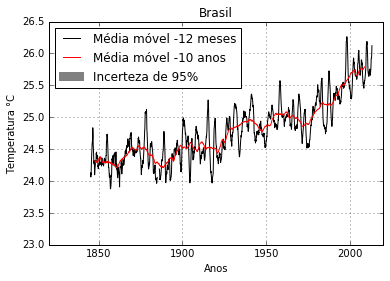

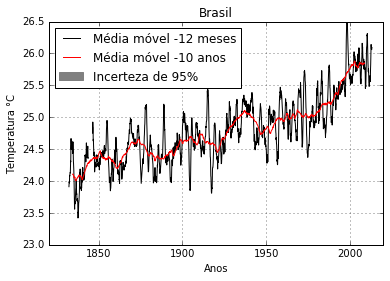

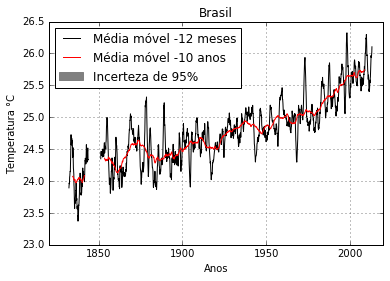

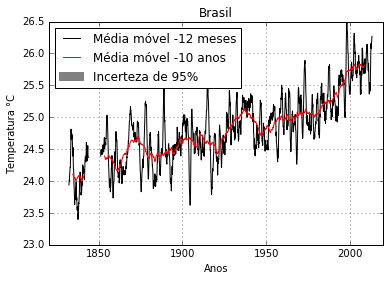

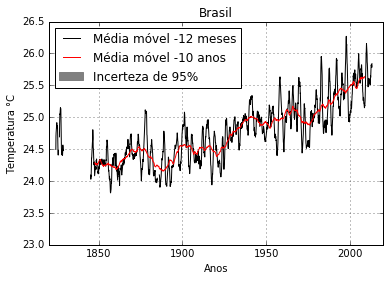

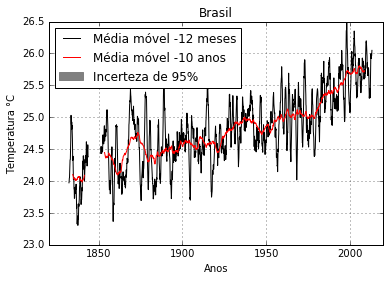

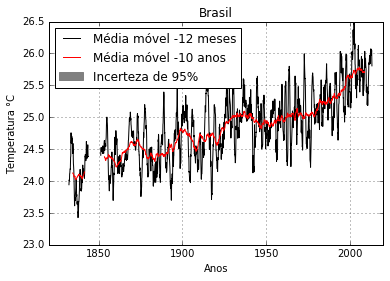

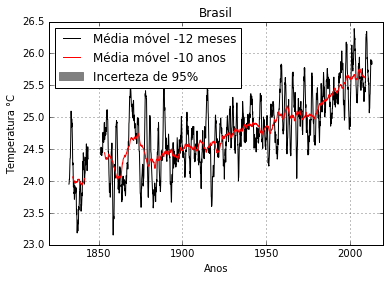

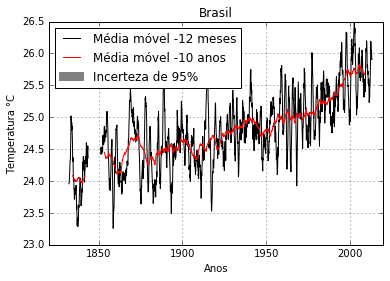

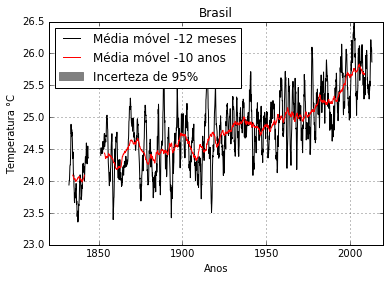

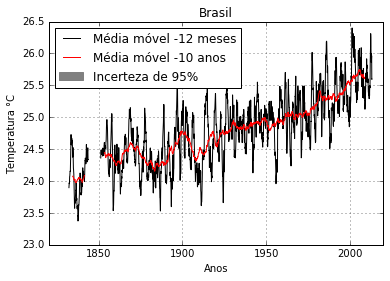

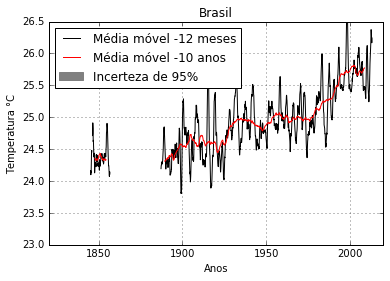

In [20]:
for arquivo in arquivos:
    #Todo arquivo que comece como definido retorna o valor "true", então para todo restante("false") executamos o seguinte.
    if arquivo.startswith("dados\\brazil") is False:
        #Chamamos arquivo de "dados" e carregamos arquivo definindo que comentários comecam com "%".
        dados = np.loadtxt(arquivo, comments = "%")
       
        #Usamos a nova funcão para nomear e definir as variáveis.
        ano_decimal, anom_1ano, anom_10anos, inc_95pos, inc_95neg = definindo_dados(dados)
        
        #Plotando gráficos
        plt.figure()
        #Plotamos a anomalia de temperatura média anual.
        plt.plot(ano_decimal,25 + anom_1ano, "black", label="Média móvel -12 meses")
        #Plotamos a anomalia de temperatura média para 10 anos.
        plt.plot(ano_decimal,25 + anom_10anos, "red", label="Média móvel -10 anos")
        #Plotamos a incerteza de +/- 95% ao redor da anomalia de temperatura média de 10 anos (Bônus).
        plt.plot(ano_decimal,inc_95pos, "gray",) 
        plt.plot(ano_decimal,inc_95neg, "gray") 
        #adicionamos grade.
        plt.grid(True) 
        #Definimos a escala do gráfico.
        plt.xlim(1820,2020)
        plt.ylim(23,26.5)
        #Preenchemos o espaco entre as plotagens de incerteza.
        plt.fill_between(ano_decimal, inc_95pos, inc_95neg, color="gray", label="Incerteza de 95%")
        #Nomeamos os eixos
        plt.xlabel ("Anos")
        plt.ylabel ("Temperatura °C")
        #Demos título ao gráfico.
        plt.title("Brasil")
        #Adicionamos legenda.
        plt.legend(loc="upper left")
        #Salvamos os gráficos em formato .png com o nome definido como abaixo.
        plt.savefig(arquivo[6:-4]+".png") 
        

## BÔNUS: Criando e testando uma função que recebe como entrada o nome de um arquivo de dados, o nome de uma pasta e o formato da figura e retorna o nome da respectiva figura trocando o .txt pela extensão e adicionando o nome da pasta.

In [32]:
def nomeando_dados(arquivo, formato, pasta):
    
    # Definindo tipo das variáveis
    assert type(arquivo) == str, "Tipo = string"
    assert type(formato) == str, "Tipo = string"
    assert type(pasta) == str, "Tipo = string"
    
    ano_decimal, anom_1ano, anom_10anos, inc_95pos, inc_95neg = definindo_dados(dados)
        
    #Plotando gráficos
    plt.figure()
    #Plotamos a anomalia de temperatura média anual.
    plt.plot(ano_decimal,25 + anom_1ano, "black", label="Média móvel -12 meses")
    #Plotamos a anomalia de temperatura média para 10 anos.
    plt.plot(ano_decimal,25 + anom_10anos, "red", label="Média móvel -10 anos")
    #Plotamos a incerteza de +/- 95% ao redor da anomalia de temperatura média de 10 anos (Bônus).
    plt.plot(ano_decimal,inc_95pos, "gray",) 
    plt.plot(ano_decimal,inc_95neg, "gray") 
    #adicionamos grade.
    plt.grid(True) 
    #Definimos a escala do gráfico.
    plt.xlim(1820,2020)
    plt.ylim(23,26.5)
    #Preenchemos o espaco entre as plotagens de incerteza.
    plt.fill_between(ano_decimal, inc_95pos, inc_95neg, color="gray", label="Incerteza de 95%")
    #Nomeamos os eixos
    plt.xlabel ("Anos")
    plt.ylabel ("Temperatura °C")
    #Demos título ao gráfico.
    plt.title("Brasil")
    #Adicionamos legenda.
    plt.legend(loc="upper left")
      
    
    # Criando a funcão
    plt.savefig( pasta + arquivo[5:-3] + formato, format = formato)

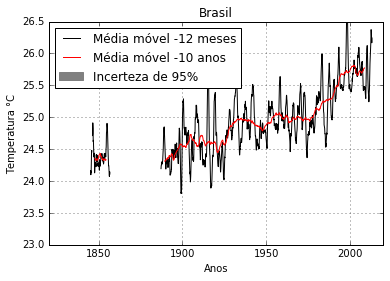

In [37]:
# Testando para o tipo de dados corretos
nomeando_dados("dados/0.80S-49.02W-TAVG-Trend.txt", "png", "figuras_teste")

In [38]:
# Testando para o tipo de dados incorretos
nomeando_dados(145, 4, 55)

AssertionError: Tipo = string